---
title: Cisd2 Correlation across rats
date: 8/24/23
author: Sabrina Mi
---

We picked Cisd2 out the selection process.

### Run Pipeline

We centered the interval at Cisd2's TSS chr2:223868946.

```
module load conda
conda activate /lus/grand/projects/TFXcan/imlab/shared/software/conda_envs/enformer-predict-tools
cd /home/s1mi/Github/shared_pipelines/enformer_pipeline
python scripts/enformer_predict.py --parameters /home/s1mi/Github/deep-learning-in-genomics/posts/2023-08-24-Cisd2-correlation-across-rats/Cisd2_personalized.json
```

### Compare to Observed

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import h5py

In [3]:
gene = "ENSRNOG00000048258"
gene_expr_bed = "/home/s1mi/enformer_rat_data/expression_data/Brain.rn7.expr.tpm.bed"
predictions_dir = "/home/s1mi/Br_predictions/predictions_folder/personalized_Br_genes/predictions_2023-08-24/enformer_predictions"
obs_gene_expr = pd.read_csv(gene_expr_bed, sep="\t", header=0, index_col='gene_id')

/tmp/ipykernel_174805/3252868614.py:4: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  obs_gene_expr = pd.read_csv(gene_expr_bed, sep="\t", header=0, index_col='gene_id')


In [7]:
obs = obs_gene_expr.loc[gene][3:]
df = pd.DataFrame({"observed": obs, "predicted": np.zeros(obs.shape)})

In [22]:
for individual in df.index:
    haplo0 = h5py.File(f"{predictions_dir}/{individual}/haplotype0/chr2_223868946_223868946_predictions.h5", "r")
    predictions = haplo0["chr2_223868946_223868946"][446:450, 0]
    df.loc[individual, "predicted"] = np.average(predictions)


In [23]:
df.corr()

,observed,predicted
observed,1.000000,0.318211
predicted,0.318211,1.000000


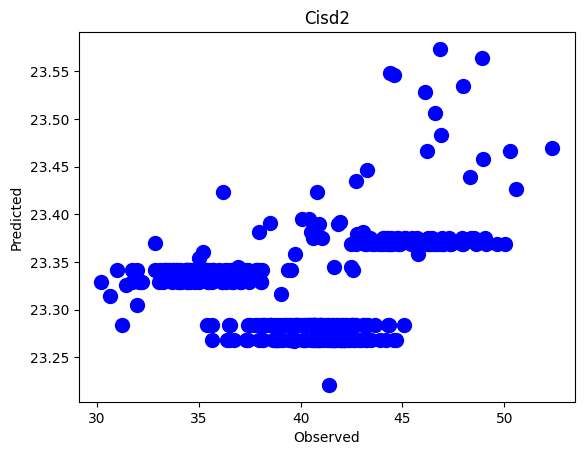

In [26]:

x = df['observed']
y = df['predicted']
# Create the dot plot
plt.scatter(x, y, color='blue', marker='o', s=100)

# Add labels and title
plt.xlabel('Observed')
plt.ylabel('Predicted')
plt.title('Cisd2')

# Show the plot
plt.show()